In [1]:
!wget https://huggingface.co/datasets/OpenRL/DeepFakeFace/resolve/main/inpainting.zip
!wget https://huggingface.co/datasets/OpenRL/DeepFakeFace/resolve/main/wiki.zip

--2024-05-06 17:58:48--  https://huggingface.co/datasets/OpenRL/DeepFakeFace/resolve/main/inpainting.zip
Resolving huggingface.co (huggingface.co)... 13.33.30.49, 13.33.30.23, 13.33.30.76, ...
Connecting to huggingface.co (huggingface.co)|13.33.30.49|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/43/54/4354080778713efff252f32d0ea8cda241f8af84fe016fdd4e0d57db34b94861/795b751f0967b2d940fbd9825e05c541666ec6f8c634acc7640044542897b7b2?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27inpainting.zip%3B+filename%3D%22inpainting.zip%22%3B&response-content-type=application%2Fzip&Expires=1715277528&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcxNTI3NzUyOH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy80My81NC80MzU0MDgwNzc4NzEzZWZmZjI1MmYzMmQwZWE4Y2RhMjQxZjhhZjg0ZmUwMTZmZGQ0ZTBkNTdkYjM0Yjk0ODYxLzc5NWI3NTFmMDk2N2IyZDk0MGZiZDk4MjVlMDVjNTQxNjY2ZWM2Zjhj

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip -q inpainting.zip
!unzip -q wiki.zip


!rm -r inpainting.zip
!rm -r wiki.zip

In [3]:
import os
import shutil

def copy_images(source_folder, destination_folder):
    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Walk through each subfolder in the source folder
    for root, dirs, files in os.walk(source_folder):
        for file in files:
            # Check if the file is an image
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
                # Get the full path of the image
                source_path = os.path.join(root, file)
                # Copy the image to the destination folder
                shutil.copy(source_path, destination_folder)

In [4]:
!rm -r real
!rm -r fake
!rm -r real_vs_fake

rm: cannot remove 'real': No such file or directory
rm: cannot remove 'fake': No such file or directory
rm: cannot remove 'real_vs_fake': No such file or directory


In [5]:
# Specify the source folder containing subfolders with images
destination_folder = 'real'
# Specify the destination folder where images will be copied
source_folder = 'wiki'

# Call the function to copy images
copy_images(source_folder, destination_folder)

In [6]:
# Specify the source folder containing subfolders with images
destination_folder = 'fake'
# Specify the destination folder where images will be copied
source_folder = 'inpainting'

# Call the function to copy images
copy_images(source_folder, destination_folder)

In [7]:
!mkdir real_vs_fake

In [8]:
import os
import shutil
import random

# Define paths
source_folder = "real"
destination_folder = "real_vs_fake"

# Create destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Create test, train, and valid folders within destination folder
folders = ['test', 'train', 'valid']
for folder in folders:
    os.makedirs(os.path.join(destination_folder, folder, 'real'), exist_ok=True)

# List all images in source folder
images = os.listdir(source_folder)
random.shuffle(images)

# Calculate the number of images for each category
total_images = len(images)
test_count = 5000
train_count = int(0.8 * (total_images - test_count))
valid_count = total_images - test_count - train_count

# Move images to respective folders
for folder, count in [('test', test_count), ('train', train_count), ('valid', valid_count)]:
    for i in range(count):
        image = images.pop()
        shutil.copy(os.path.join(source_folder, image), os.path.join(destination_folder, folder, 'real'))

# Copy train, valid, and test folders to real_vs_fake
# for folder in folders:
#     shutil.copytree(os.path.join(destination_folder, folder), os.path.join(destination_folder, 'real_vs_fake', folder))


In [9]:
import os
import shutil
import random

In [10]:
# Define paths
source_folder = "fake"
destination_folder = "real_vs_fake"

# Create destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Create test, train, and valid folders within destination folder
folders = ['test', 'train', 'valid']
for folder in folders:
    os.makedirs(os.path.join(destination_folder, folder, 'fake'), exist_ok=True)

# List all images in source folder
images = os.listdir(source_folder)
random.shuffle(images)

# Calculate the number of images for each category
total_images = len(images)
test_count = 5000
train_count = int(0.8 * (total_images - test_count))
valid_count = total_images - test_count - train_count

# Move images to respective folders
for folder, count in [('test', test_count), ('train', train_count), ('valid', valid_count)]:
    for i in range(count):
        image = images.pop()
        shutil.copy(os.path.join(source_folder, image), os.path.join(destination_folder, folder, 'fake'))

# Copy train, valid, and test folders to real_vs_fake
# for folder in folders:
#     shutil.copytree(os.path.join(destination_folder, folder), os.path.join(destination_folder, 'real_vs_fake', folder))


In [11]:
# !rm -r /kaggle/working/real_vs_fake
# !rm -r /kaggle/working/fake
# !rm -r /kaggle/working/real

In [12]:
def count_files(folder_path):
    # Initialize count
    file_count = 0

    # Walk through the folder and count files
    for _, _, files in os.walk(folder_path):
        file_count += len(files)

    return file_count

In [13]:
# Specify the folder path
folders = ['test', 'train', 'valid']
folder_path = 'real_vs_fake/'

for i in folders:
  print("Number of files in fake/"+str(i)+" :", count_files(folder_path+i+'/fake'))

Number of files in fake/test : 5000
Number of files in fake/train : 20000
Number of files in fake/valid : 5000


In [14]:
# Specify the folder path
folders = ['test', 'train', 'valid']
folder_path = 'real_vs_fake/'

for i in folders:
  print("Number of files in real/"+str(i)+" :", count_files(folder_path+i+'/real'))

Number of files in real/test : 5000
Number of files in real/train : 20000
Number of files in real/valid : 5000


In [15]:
import cv2
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tqdm import tqdm

In [16]:
import keras

In [17]:
base_path = 'real_vs_fake/'
image_gen = ImageDataGenerator(rescale=1./255)

train_flow = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

Found 40000 images belonging to 2 classes.


In [18]:
image_gen1 = ImageDataGenerator(rescale=1./255)

valid_flow = image_gen1.flow_from_directory(
    base_path + 'valid/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

Found 10000 images belonging to 2 classes.


In [19]:
image_gen1 = ImageDataGenerator(rescale=1./255.)
test_flow = image_gen.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

Found 10000 images belonging to 2 classes.


In [20]:
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

Number of devices: 1


In [54]:
def build_model(pretrained, learning_rate=0.0001):
    model = Sequential([
        pretrained,
        layers.GlobalAveragePooling2D(),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(learning_rate=learning_rate),
        metrics=['accuracy', keras.metrics.AUC(), keras.metrics.Precision(), keras.metrics.Recall()]
    )

    return model

In [55]:
densenet = DenseNet121(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)
model = build_model(densenet)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d_2  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 7038529 (26.85 MB)
Trainable params: 6954881 (26.53 MB)
Non-trainable params: 83648 (326.75 KB)
_________________________________________________________________


In [56]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5)  # Stop training if no improvement after 3 epochs
checkpoint = ModelCheckpoint('DenseNetImagenet.model.keras', monitor='val_loss', save_best_only=True)  # Save the best model

In [24]:
# !rm /kaggle/working/DenseNetNoW.keras

In [57]:
history = model.fit(
    train_flow,
    epochs = 3,
    validation_data =valid_flow,
    callbacks=[checkpoint]
)

Epoch 1/3
625/625 [==============================] - 602s 799ms/step - loss: 0.2033 - accuracy: 0.9108 - auc: 0.9746 - precision: 0.9177 - recall: 0.9025 - val_loss: 0.5374 - val_accuracy: 0.8229 - val_auc: 0.9744 - val_precision: 0.9969 - val_recall: 0.6478
Epoch 2/3
625/625 [==============================] - 532s 851ms/step - loss: 0.0578 - accuracy: 0.9784 - auc: 0.9976 - precision: 0.9791 - recall: 0.9776 - val_loss: 0.1308 - val_accuracy: 0.9558 - val_auc: 0.9911 - val_precision: 0.9812 - val_recall: 0.9294
Epoch 3/3
625/625 [==============================] - 495s 791ms/step - loss: 0.0333 - accuracy: 0.9875 - auc: 0.9992 - precision: 0.9886 - recall: 0.9863 - val_loss: 0.1185 - val_accuracy: 0.9633 - val_auc: 0.9917 - val_precision: 0.9492 - val_recall: 0.9790


In [58]:
import pickle
with open('trainHistoryDenseNetNoW.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

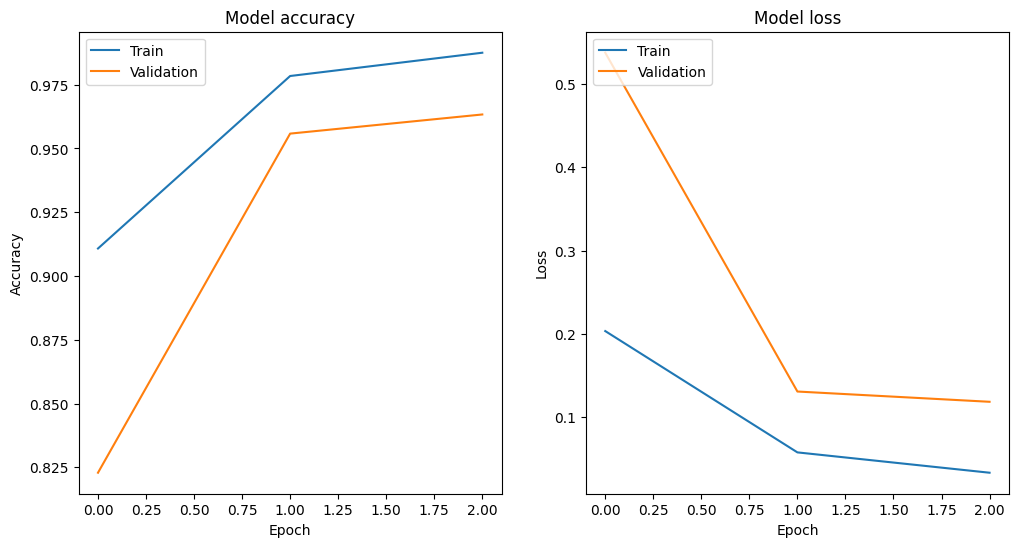

In [59]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, mean_absolute_error, mean_squared_error, accuracy_score

# Accuracy and loss history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [28]:
# from tensorflow.keras.models import load_model
# model2 = build_model(densenet)
# model2.compile()
# # Load the model
# model2.load_weights('/kaggle/working/DenseNetNoW.weights.h5')

In [29]:
# from tensorflow.keras.models import load_model


# model2 = build_model(densenet)

# # Load the model
# model2.load_weights('DenseNetImagenet.model.keras')

# Valid

In [62]:
loss, accuracy, auc, precision, recall = model.evaluate(test_flow)

 53/157 [=========>....................] - ETA: 51s - loss: 0.1036 - accuracy: 0.9620 - auc: 0.9938 - precision: 0.9506 - recall: 0.9755

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


157/157 [==============================] - 57s 356ms/step - loss: 0.1046 - accuracy: 0.9640 - auc: 0.9932 - precision: 0.9529 - recall: 0.9762


In [65]:
!cp -r /content/DenseNetImagenet.model.keras /content/drive/MyDrive/UPC/TER